<a href="https://colab.research.google.com/github/BrandonKTC/Statistic_python/blob/main/Prophet_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Facebook Prophet

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Facebook Prophet


In [4]:
# import Libraries
import pandas as pd
import numpy as np
from prophet import Prophet

In [54]:
df = pd.read_csv('DHS_Daily_Report_2020.csv')
df.head()

,Date,Total Individuals in Shelter,Easter,Thanksgiving,Christmas,Temperature
0,1/1/2014,50689,0,0,0,2.17
1,1/2/2014,50797,0,0,0,2.51
2,1/3/2014,50954,0,0,0,-6.35
3,1/4/2014,50957,0,0,0,-1.27
4,1/5/2014,50957,0,0,0,7.18


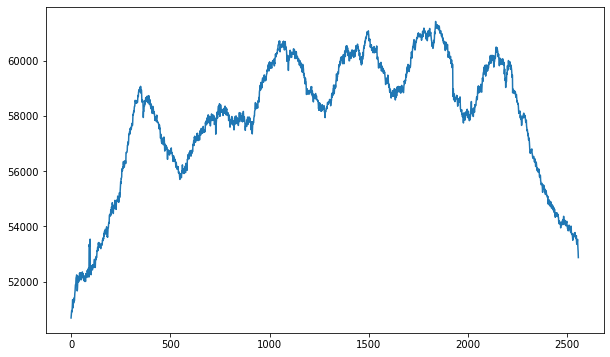

In [47]:
df['Total Individuals in Shelter'].plot(figsize=(10, 6))

In [55]:
# data preparation
df.Date = pd.to_datetime(df.Date,
                         format="%m/%d/%Y")

In [56]:
df.rename(columns={"Date": 'ds',
                   'Total Individuals in Shelter': 'y'}, inplace=True)
df.head(2)

,ds,y,Easter,Thanksgiving,Christmas,Temperature
0,2014-01-01,50689,0,0,0,2.17
1,2014-01-02,50797,0,0,0,2.51


In [57]:
easter_dates = df[df.Easter == 1].ds
easter_dates = pd.DataFrame({'holiday':'easter',
                             'ds': easter_dates,
                             'lower_window': -5,
                             'upper_window': 2})

tg_dates = df[df.Thanksgiving == 1].ds
tg_dates = pd.DataFrame({'holiday':'thanksgiving',
                         'ds': tg_dates,
                         'lower_window': -7,
                         'upper_window':4})

holidays = pd.concat([easter_dates, tg_dates])
holidays

,holiday,ds,lower_window,upper_window
109,easter,2014-04-20,-5,2
459,easter,2015-04-05,-5,2
816,easter,2016-03-27,-5,2
1201,easter,2017-04-16,-5,2
1551,easter,2018-04-01,-5,2
1936,easter,2019-04-21,-5,2
2293,easter,2020-04-12,-5,2
330,thanksgiving,2014-11-27,-7,4
694,thanksgiving,2015-11-26,-7,4
1058,thanksgiving,2016-11-24,-7,4


In [58]:
df.drop(["Thanksgiving", "Easter"], axis=1, inplace=True)
df.head(2)

,ds,y,Christmas,Temperature
0,2014-01-01,50689,0,2.17
1,2014-01-02,50797,0,2.51


In [59]:
# Training and test sets
test_days = 31

training_set = df.iloc[:-test_days, :]
test_set = df.iloc[-test_days:, :]

len(training_set), len(test_set)

(2526, 31)

# Prophet Model

In [89]:
# Prophet
m = Prophet(growth='linear',
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode="multiplicative",
            seasonality_prior_scale=3,
            holidays_prior_scale=4,
            changepoint_prior_scale=1)
m.add_regressor('Christmas')
m.fit(training_set)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmh1_zll/v8sbsia5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmh1_zll/t7fj7wed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23767', 'data', 'file=/tmp/tmpxmh1_zll/v8sbsia5.json', 'init=/tmp/tmpxmh1_zll/t7fj7wed.json', 'output', 'file=/tmp/tmpqu5919be/prophet_model-20220822103451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:34:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:34:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [90]:
from prophet.utilities import regressor_coefficients

regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Christmas,multiplicative,0.0,-0.000746,-0.000746,-0.000746


In [91]:
future = m.make_future_dataframe(periods=test_days,
                                 freq='D')
future = pd.concat([future, df.iloc[:, 2:]], axis=1)
future.head(2)

,ds,Christmas,Temperature
0,2014-01-01,0,2.17
1,2014-01-02,0,2.51


In [92]:
# prediction
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,extra_regressors_multiplicative,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,50173.107080,50521.255188,51290.041287,50173.107080,50173.107080,0.0,0.0,0.0,0.0,...,0.000675,0.000675,0.000675,0.014368,0.014368,0.014368,0.0,0.0,0.0,50927.892820
1,2014-01-02,50190.587321,50556.026360,51337.701935,50190.587321,50190.587321,0.0,0.0,0.0,0.0,...,0.000574,0.000574,0.000574,0.014563,0.014563,0.014563,0.0,0.0,0.0,50950.355769
2,2014-01-03,50208.067563,50516.559101,51303.629026,50208.067563,50208.067563,0.0,0.0,0.0,0.0,...,-0.000829,-0.000829,-0.000829,0.014821,0.014821,0.014821,0.0,0.0,0.0,50910.620689
3,2014-01-04,50225.547804,50560.302379,51305.331749,50225.547804,50225.547804,0.0,0.0,0.0,0.0,...,-0.001503,-0.001503,-0.001503,0.015141,0.015141,0.015141,0.0,0.0,0.0,50910.501147
4,2014-01-05,50243.028045,50660.708743,51430.940439,50243.028045,50243.028045,0.0,0.0,0.0,0.0,...,0.000160,0.000160,0.000160,0.015518,0.015518,0.015518,0.0,0.0,0.0,51030.764280


#Visualization

In [93]:
preds = forecast.yhat

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df['y'], preds)
rmse = np.sqrt(mean_squared_error(df['y'], preds)) 

print("MAE", mae)
print("RMSE", rmse)

MAE 220.51565785867132
RMSE 328.6440077169535


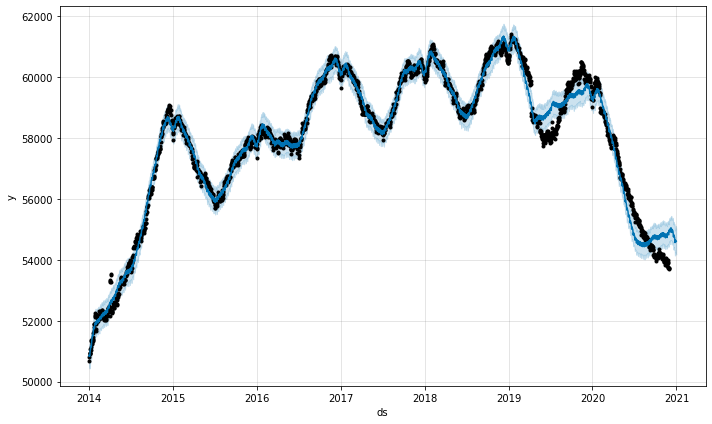

In [68]:
m.plot(forecast);

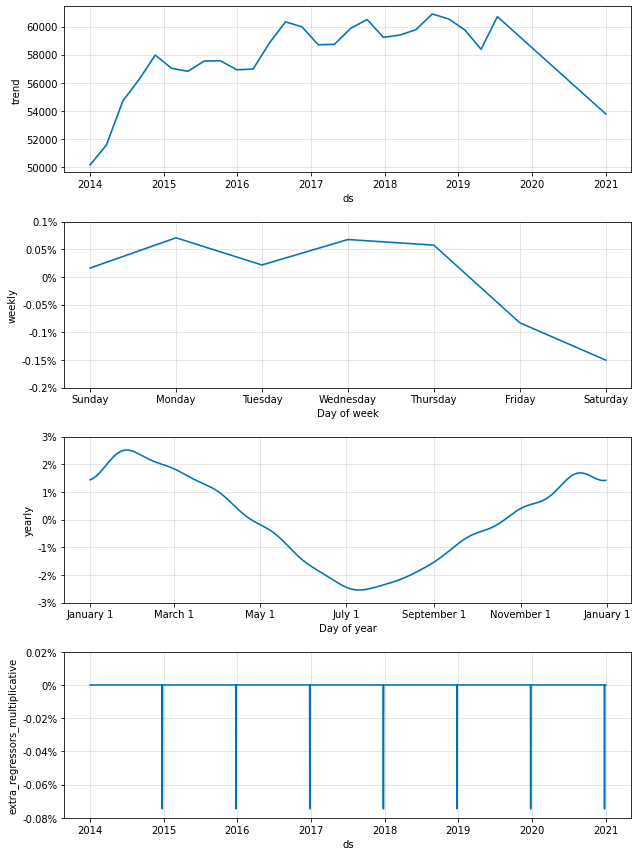

In [95]:
m.plot_components(forecast);

# Cross Validation

In [96]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m,
                 "31 days",
                 "1500 days",
                 parallel="processes")
df_cv.head()

INFO:prophet:Making 2 forecasts with cutoffs between 2016-09-21 00:00:00 and 2020-10-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fda53ab5bd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmh1_zll/c7bze_mk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmh1_zll/6y3cv3_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmh1_zll/w0a2343r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90568', 'data', 'file=/tmp/tmpxmh1_zll/c7bze_mk.json', 'init=/tmp/tmpxmh1_zll/w0a2343r.json', 'output', 'file=/tmp/tmpvf455bw9/prophet_model-20220822103533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:35:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmh1_zll/yriya2th.json
DEBUG:cmdstanpy:idx 0
DEBU

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-09-22,59788.540180,59631.247627,59958.080561,59763,2016-09-21
1,2016-09-23,59719.000338,59548.734972,59893.574568,59787,2016-09-21
2,2016-09-24,59685.050824,59532.252792,59859.984754,59624,2016-09-21
3,2016-09-25,59825.617226,59655.871907,59990.808809,59857,2016-09-21
4,2016-09-26,59882.365139,59718.751948,60051.663678,59939,2016-09-21


In [97]:
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])) 

print("MAE", mae)
print("RMSE", rmse)

MAE 891.9726299923017
RMSE 1228.0742555777026


#Parameter Tuning

In [85]:
from sklearn.model_selection import ParameterGrid

param_grid = {'seasonality_prior_scale': range(1,10),
              'holidays_prior_scale': range(1,10),
              'changepoint_prior_scale': [0.3, 0.4, 0.7, 1]}
grid = ParameterGrid(param_grid)

In [ ]:
rmse = []

for params in grid:
  m = Prophet(growth='linear',
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode="multiplicative",
            seasonality_prior_scale=params["seasonality_prior_scale"],
            holidays_prior_scale=params["holidays_prior_scale"],
            changepoint_prior_scale=params["changepoint_prior_scale"])
  m.add_regressor('Christmas')
  m.fit(training_set)

  df_cv = cross_validation(m,
                           "31 days",
                           "1500 days",
                           parallel="processes")
  
  rmse.append(np.sqrt(mean_absolute_error(df_cv['y'], df_cv['yhat'])))

In [88]:
best_params = grid[np.argmin(rmse)]
best_params

{'seasonality_prior_scale': 3,
 'holidays_prior_scale': 4,
 'changepoint_prior_scale': 1}